#Regression Analysis.

In [1]:
#Now, we are Importing all the Libraries.
from sklearn import datasets;
from sklearn import linear_model;
from sklearn import metrics;
from sklearn import model_selection;

#Now, we Load the Values of the Datasets.
data=datasets.load_diabetes();

#Now, we have to show the Values of the Data.
print(data.data);
print("\n 1. Total Number of Features of the Data Values are: ",data.feature_names);

[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990749
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06833155
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286131
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04688253
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452873
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00422151
   0.00306441]]

 1. Total Number of Features of the Data Values are:  ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [2]:
#Now, we have to show the Type of the DataValues.
import numpy as np;
import pandas as pd;
import matplotlib as plt;

#Now, we have to swap the values for the Simplicity!
diabetes=data.data;
print("\n 1. Type of the Datasets Diabetes: ",type(diabetes));
print("\n 2. Type of the Datasets diabetes.target: ",type(data.target));
feature_names=data.feature_names;
print("\n 3. Type of the Datasets feature_names: ",type(feature_names));

#Now, convert the data it into the DataFrames.
dfDia=pd.DataFrame(data=diabetes,columns=feature_names);
dfDia.head();


 1. Type of the Datasets Diabetes:  <class 'numpy.ndarray'>

 2. Type of the Datasets diabetes.target:  <class 'numpy.ndarray'>

 3. Type of the Datasets feature_names:  <class 'list'>


In [3]:
#Now, we have to show the values of the Coorelations.
cor1=dfDia.corr();
print(cor1);

          age       sex       bmi        bp        s1        s2        s3  \
age  1.000000  0.173737  0.185085  0.335428  0.260061  0.219243 -0.075181   
sex  0.173737  1.000000  0.088161  0.241010  0.035277  0.142637 -0.379090   
bmi  0.185085  0.088161  1.000000  0.395411  0.249777  0.261170 -0.366811   
bp   0.335428  0.241010  0.395411  1.000000  0.242464  0.185548 -0.178762   
s1   0.260061  0.035277  0.249777  0.242464  1.000000  0.896663  0.051519   
s2   0.219243  0.142637  0.261170  0.185548  0.896663  1.000000 -0.196455   
s3  -0.075181 -0.379090 -0.366811 -0.178762  0.051519 -0.196455  1.000000   
s4   0.203841  0.332115  0.413807  0.257650  0.542207  0.659817 -0.738493   
s5   0.270774  0.149916  0.446157  0.393480  0.515503  0.318357 -0.398577   
s6   0.301731  0.208133  0.388680  0.390430  0.325717  0.290600 -0.273697   

           s4        s5        s6  
age  0.203841  0.270774  0.301731  
sex  0.332115  0.149916  0.208133  
bmi  0.413807  0.446157  0.388680  
bp   0.2

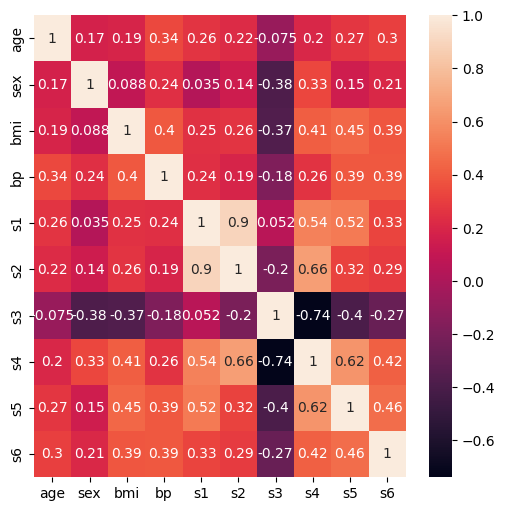

In [4]:
#Now, we have to visualise the values of the Datasets.
import seaborn as sns;
import matplotlib.pyplot as plt;
plt.figure(1,figsize=(6,6));
sns.heatmap(cor1,annot=True);

<Figure size 640x480 with 0 Axes>

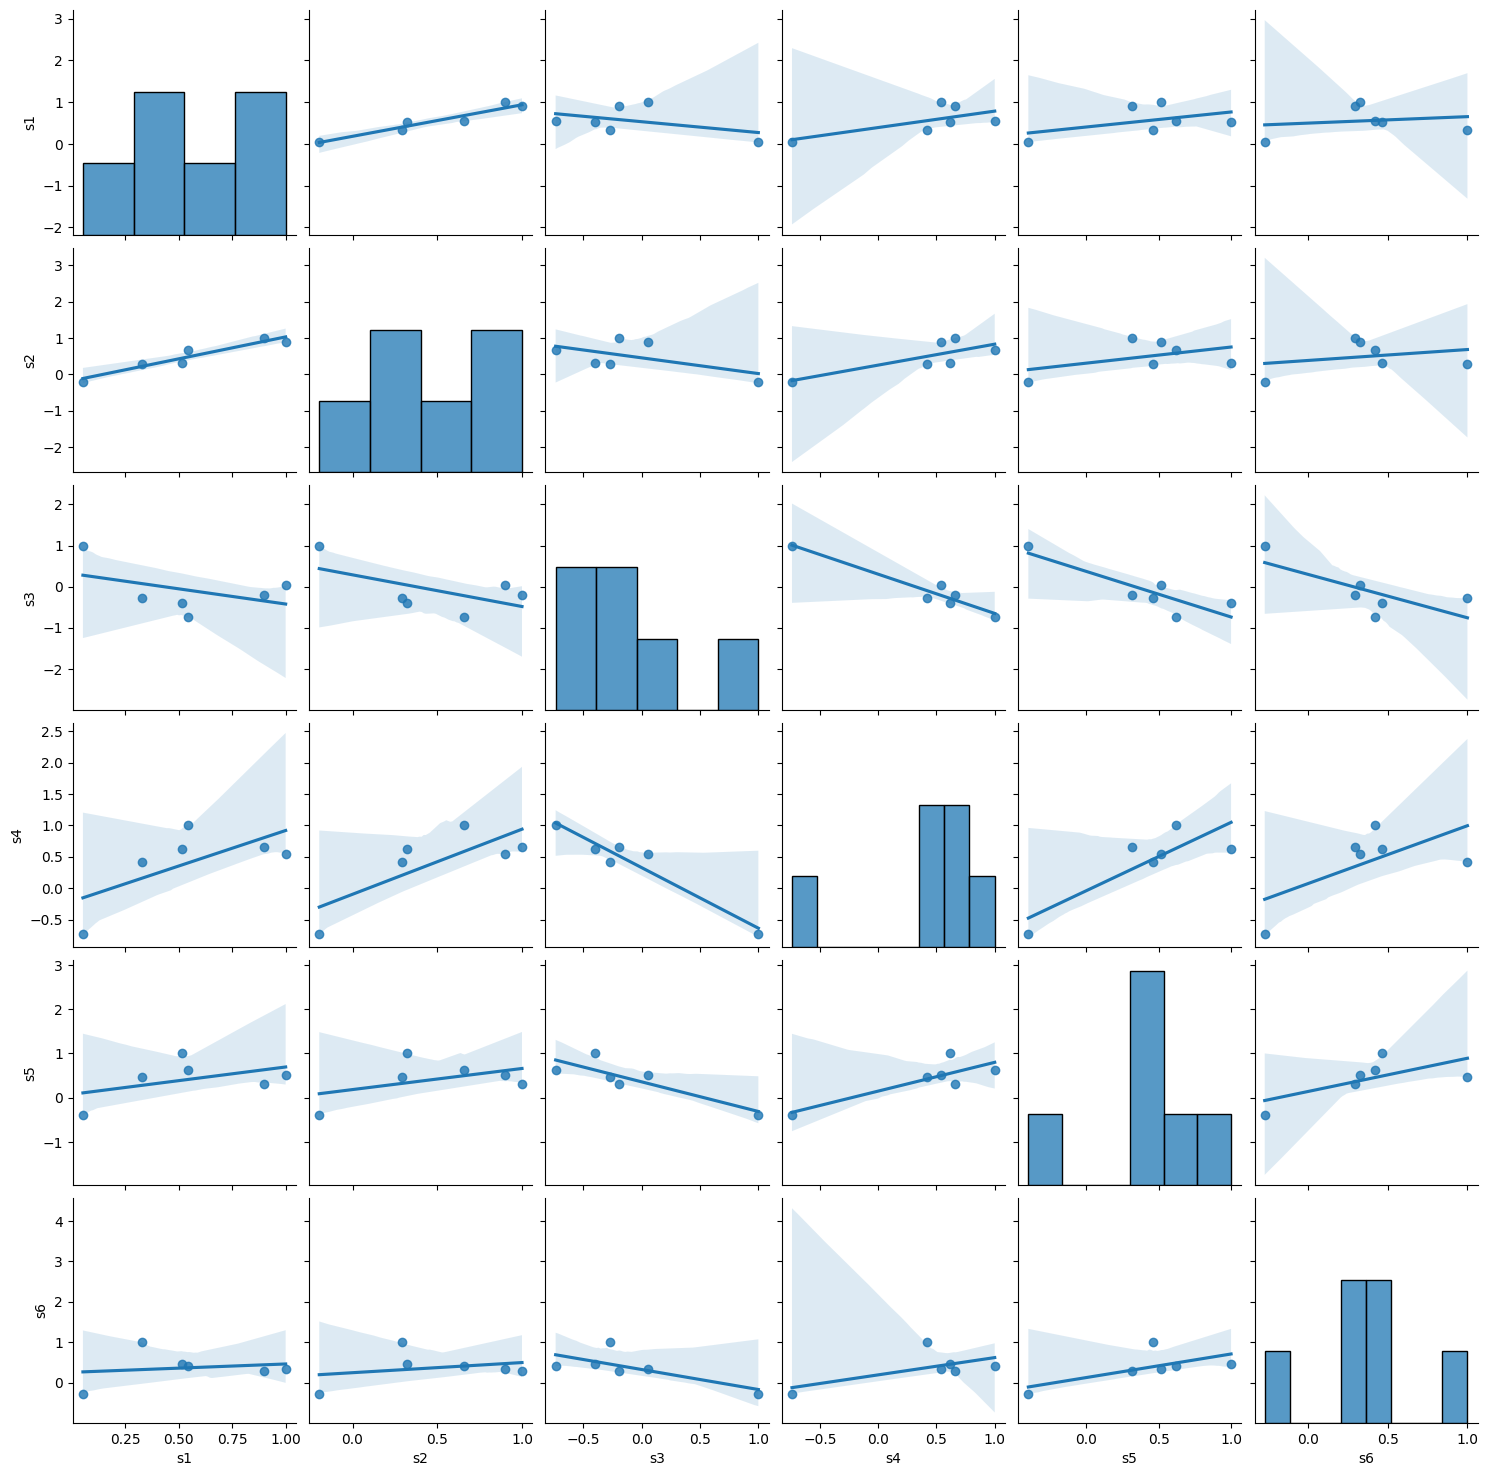

In [5]:
#Visualising the Values in the form of the PairPlot.
newData=dfDia.drop(['age','sex','bmi','bp'],axis=1,inplace=False);
corNew=newData.corr();
plt.figure(1);
sns.pairplot(corNew,kind='reg');

In [7]:
#Now, we need to train the model and make the Linear Regression Model.
#Take 'BMI' as Dependent Variable and 's6' is the Independent Variable.
X=dfDia['s6'].values; #Independent Variable.
y=dfDia['bmi'].values;  #Dependent Variable.

#If the Single Independent Variable is Considered.
X=X.reshape(-1,1);
#Now, we have to split it into training and testing phases.
ratio=0.3;
Xtrain,Xtest,ytrain,ytest=model_selection.train_test_split(X,y,test_size=ratio,random_state=7);
print(Xtrain.shape,ytrain.shape);
print(Xtest.shape,ytest.shape);

(309, 1) (309,)
(133, 1) (133,)


In [11]:
#Now, creating the values of the Linear_Models.
lnModel=linear_model.LinearRegression();
#Now, we have to train the Model.
lmModel=lnModel.fit(Xtrain,ytrain);
#Now, we have to predict the values by using the testing-Training.
ypredTrn = lmModel.predict(Xtrain) # Assign the result of prediction to ypredTrn
#Now, we have to predict the values based on the Testing Phases.
ypredTst = lmModel.predict(Xtest) # Assign the result of prediction to ypredTst
#Metrics.
r2ScoreTrain =metrics.r2_score(ytrain,ypredTrn)
r2ScoreTest =metrics.r2_score(ytest,ypredTst)
print('Training r2 value:',r2ScoreTrain)
print('Testing r2 value:',r2ScoreTest)

Training r2 value: 0.1785362812503084
Testing r2 value: 0.08310977469533232


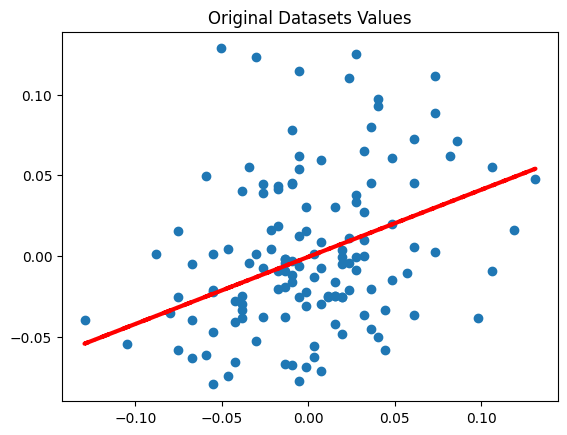

In [12]:
#Now, we have to visualise the values of the Data.
plt.figure(1);
plt.title("Original Datasets Values");
plt.scatter(Xtest,ytest);
plt.plot(Xtest,ypredTst,'--r',linewidth=3);
plt.show();

#Now, we Importing the Values of the (NEW DATASETS)-"California_Housing"

In [41]:
#Importing ther values of the Data.
from sklearn import datasets;
from sklearn import linear_model;
from sklearn import metrics;
from sklearn import model_selection;

#Now, we have to import the Values of the Datasets.
newData=datasets.fetch_california_housing();

#Now, we have to show the Values of the Data.
print("\n 1. Values of the Feature Names: ",newData.feature_names);
print("\n--------------------------------------------------------------");

print("\n 2. Values of the Data: \n",newData.data);
print("\n--------------------------------------------------------------");

print("\n 3. Describe the Values of the Data: ",newData.DESCR);
print("\n--------------------------------------------------------------");

print("\n 4. Values of the Target: ",newData.target);
print("\n--------------------------------------------------------------");

print("\n 5. Name of the Valuable Targets: ",newData.target_names);
print("\n--------------------------------------------------------------");


 1. Values of the Feature Names:  ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']

--------------------------------------------------------------

 2. Values of the Data: 
 [[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]

--------------------------------------------------------------

 3. Describe the Values of the Data:  .. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteri

In [42]:
#Now, we conver the Data it into the DataFrames.
dfNew2=pd.DataFrame(data=newData.data,columns=newData.feature_names);
dfNew2['MedHouseValue']=newData.target;
dfNew2.head();

In [43]:
#Now, making the values of the Coorelations.
cor2=dfNew2.corr();
print(cor2);

                 MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
MedInc         1.000000 -0.119034  0.326895  -0.062040    0.004834  0.018766   
HouseAge      -0.119034  1.000000 -0.153277  -0.077747   -0.296244  0.013191   
AveRooms       0.326895 -0.153277  1.000000   0.847621   -0.072213 -0.004852   
AveBedrms     -0.062040 -0.077747  0.847621   1.000000   -0.066197 -0.006181   
Population     0.004834 -0.296244 -0.072213  -0.066197    1.000000  0.069863   
AveOccup       0.018766  0.013191 -0.004852  -0.006181    0.069863  1.000000   
Latitude      -0.079809  0.011173  0.106389   0.069721   -0.108785  0.002366   
Longitude     -0.015176 -0.108197 -0.027540   0.013344    0.099773  0.002476   
MedHouseValue  0.688075  0.105623  0.151948  -0.046701   -0.024650 -0.023737   

               Latitude  Longitude  MedHouseValue  
MedInc        -0.079809  -0.015176       0.688075  
HouseAge       0.011173  -0.108197       0.105623  
AveRooms       0.106389  -0.027540       0.

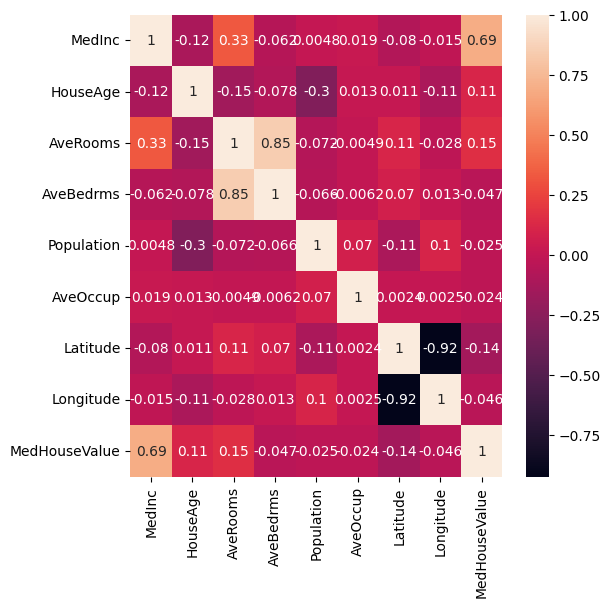

In [44]:
#Now, we have to visualise the values by using the heatmap properties.
import seaborn as sns;
import matplotlib.pyplot as plt;
plt.figure(1,figsize=(6,6));
sns.heatmap(cor2,annot=True);

<Figure size 640x480 with 0 Axes>

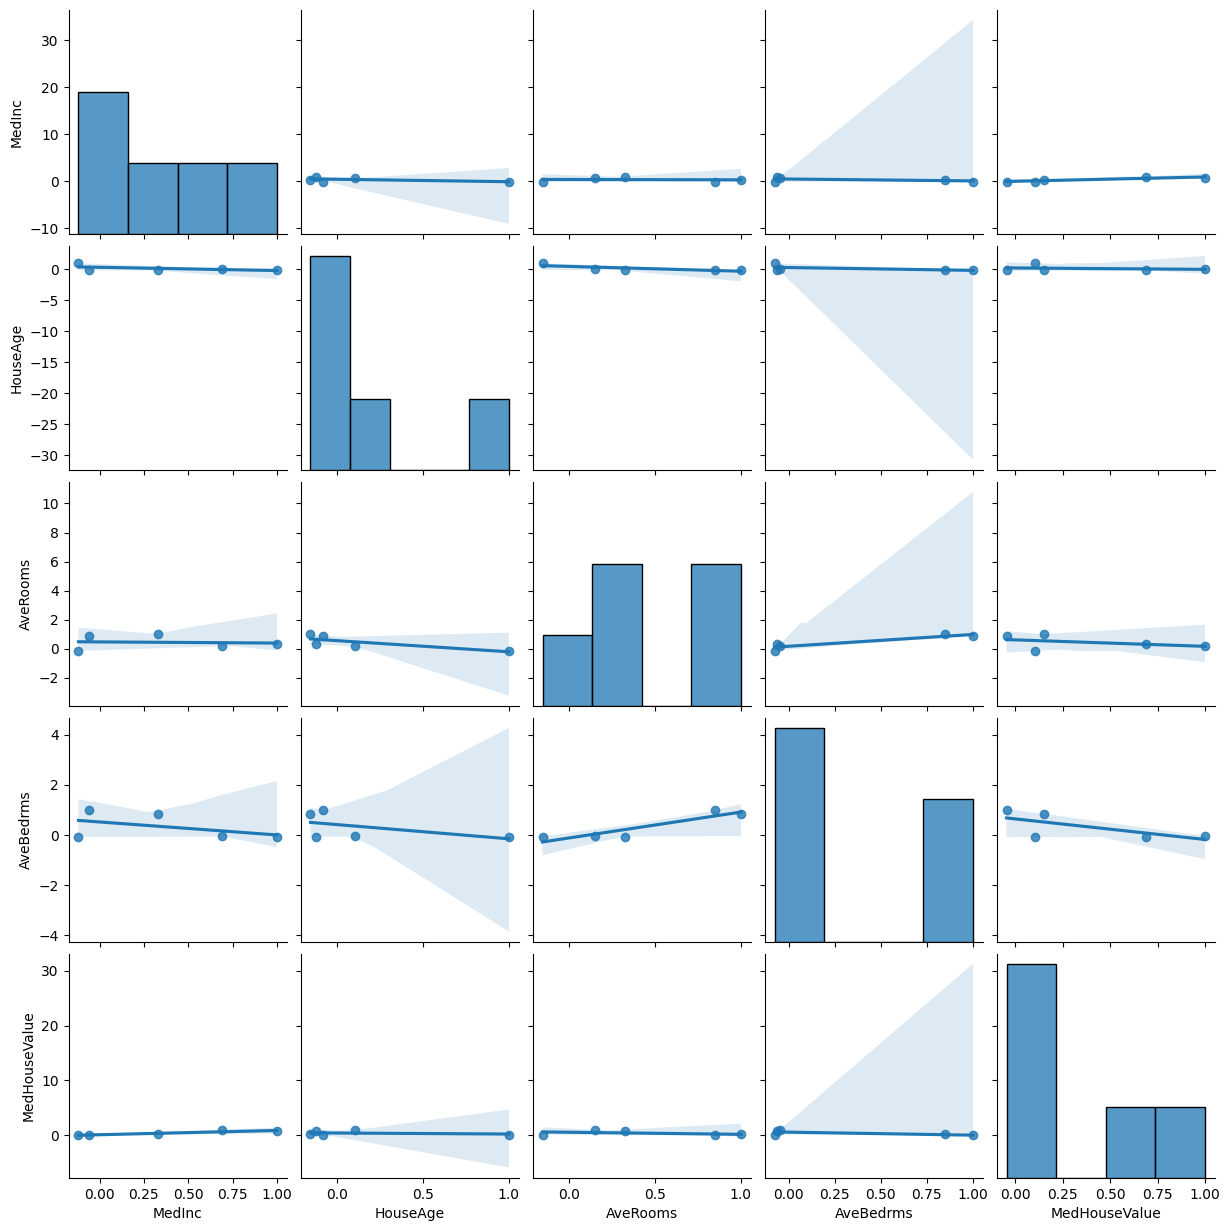

In [45]:
newData2 = dfNew2.drop(['Longitude','Latitude','Population','AveOccup'],axis=1,inplace=False)
cor2New = newData2.corr() # Use the correct DataFrame and method name
plt.figure(1)
sns.pairplot(cor2New,kind ='reg')

#Converting the Data it into the DataFrames.

In [46]:
newHousing = pd.DataFrame(newData.data,columns=newData.feature_names)
newHousing['MedHouseVal'] = newData.target
newHousing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


<Axes: >

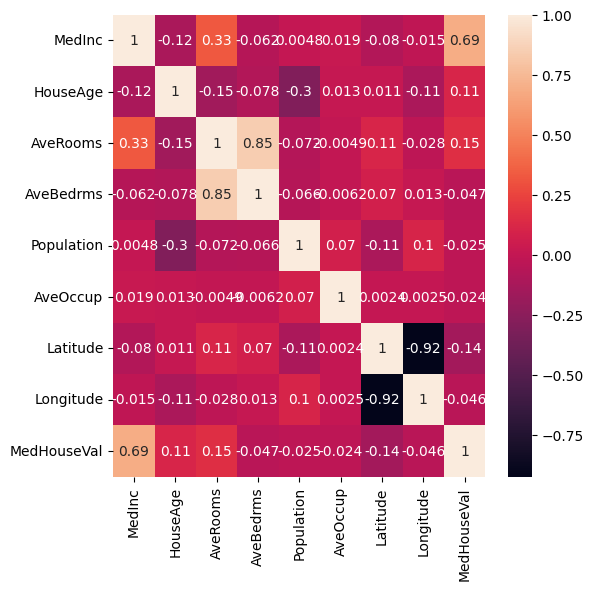

In [47]:
# correlation
Newcor = newHousing.corr()
plt.figure(2,(6,6))
sns.heatmap(Newcor,annot=True)

In [48]:
# normal linear regression (simple linear regression)
#now create the linear model
# where BMI is the dependent variable and s5 as the independent variable
X = newHousing['MedInc','HouseAge','AveRooms,AveBedrms'].values # independent variable
y = newHousing['MedHouseVal'].values # dependent variable

# if single independent variable is considered
X = X.reshape(-1,1);
# split the data into train and test
ratio= 0.3;
[Xtrain,Xtest,ytrain,ytest] = model_selection.train_test_split(
    X,y,test_size=ratio,random_state=5
);

print(Xtrain.shape,ytrain.shape);
print(Xtest.shape,ytest.shape);

# create the linear model
lnModel = linear_model.LinearRegression()
# train the model using train data
lnModel = lnModel.fit(Xtrain,ytrain)
# predict the xtrain data
ypredTrn = lnModel.predict(Xtrain)
# predict the xtest data
ypredTst = lnModel.predict(Xtest)
# metrics
r2ScoreTrain =metrics.r2_score(ytrain,ypredTrn)
r2ScoreTest =metrics.r2_score(ytest,ypredTst)
print('Training r2 value:',r2ScoreTrain)
print('Testing r2 value:',r2ScoreTest)

KeyError: ('MedInc', 'HouseAge', 'AveRooms,AveBedrms')

In [37]:
newHousing.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

In [49]:
# normal linear regression (simple linear regression)
#now create the linear model
# where BMI is the dependent variable and s5 as the independent variable
X = newHousing[['MedInc','HouseAge','AveRooms','AveBedrms']].values # independent variable. Use a list of column names
y = newHousing['MedHouseVal'].values # dependent variable

# if single independent variable is considered
#X = X.reshape(-1,1); # Commenting out for multiple linear regression
# split the data into train and test
ratio= 0.3;
[Xtrain,Xtest,ytrain,ytest] = model_selection.train_test_split(
    X,y,test_size=ratio,random_state=5
);

print(Xtrain.shape,ytrain.shape);
print(Xtest.shape,ytest.shape);

# create the linear model
lnModel = linear_model.LinearRegression()
# train the model using train data
lnModel = lnModel.fit(Xtrain,ytrain)
# predict the xtrain data
ypredTrn = lnModel.predict(Xtrain)
# predict the xtest data
ypredTst = lnModel.predict(Xtest)
# metrics
r2ScoreTrain =metrics.r2_score(ytrain,ypredTrn)
r2ScoreTest =metrics.r2_score(ytest,ypredTst)
print('Training r2 value:',r2ScoreTrain)
print('Testing r2 value:',r2ScoreTest)

(14448, 4) (14448,)
(6192, 4) (6192,)
Training r2 value: 0.533343341289668
Testing r2 value: 0.5460510370959814


In [50]:
# multiple linear regression
#now create the linear model
# where BMI is the dependent variable and s5 as the independent variable
X = newHousing[['MedInc']].values # independent variable
y = newHousing['MedHouseVal'].values # dependent variable

# if single independent variable is considered
X = X.reshape(-1,1)
# split the data into train and test
ratio= 0.3
[Xtrain,Xtest,ytrain,ytest] = model_selection.train_test_split(
    X,y,test_size=ratio,random_state=5
)

print(Xtrain.shape,ytrain.shape)
print(Xtest.shape,ytest.shape)

# create the linear model
lnModel = linear_model.LinearRegression()
# train the model using train data
lnModel = lnModel.fit(Xtrain,ytrain)
# predict the xtrain data
ypredTrn = lnModel.predict(Xtrain)
# predict the xtest data
ypredTst = lnModel.predict(Xtest)
# metrics
r2ScoreTrain =metrics.r2_score(ytrain,ypredTrn)
r2ScoreTest =metrics.r2_score(ytest,ypredTst)
print('Training r2 value:',r2ScoreTrain)
print('Testing r2 value:',r2ScoreTest)

(14448, 1) (14448,)
(6192, 1) (6192,)
Training r2 value: 0.4684474534190508
Testing r2 value: 0.48448851967708917


In [51]:
newHousing.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

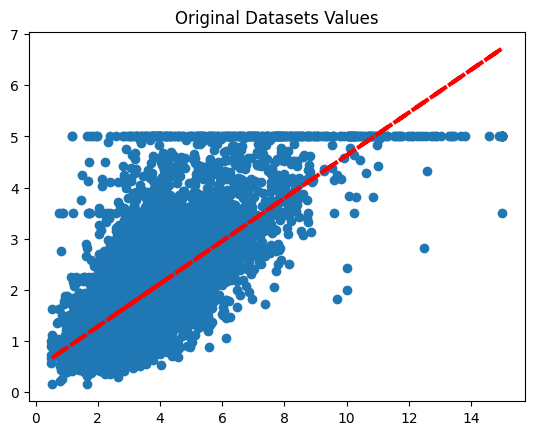

In [52]:
#Now, we have to visualise the values of the Data.
plt.figure(1);
plt.title("Original Datasets Values");
plt.scatter(Xtest,ytest);
plt.plot(Xtest,ypredTst,'--r',linewidth=3);
plt.show();

----------------------------------- Day-11 (File No: 1) ------------------------